Original data:
  ts shape: (3,), values: [0. 1. 2.]
  taus shape: (4,), values: [0. 1. 2. 3.]
  data shape: (4, 3)
  data:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

=== No padding (1,1) ===
pad_rows=(1, 1), pad_cols=(1, 1)
  Original shape: (4, 3)
  Padded shape: (4, 3)
  Expected shape: (12, 9)
  Extended ts: 3 points, range [0.0, 2.0]
  Extended taus: 4 points, range [0.0, 3.0]
  Data range: [0.0, 11.0]
  Time spacing preserved: True
  Tau spacing preserved: True

=== Add 1x before rows, 1x after cols ===
pad_rows=(2, 1), pad_cols=(1, 2)
  Original shape: (4, 3)
  Padded shape: (8, 6)
  Expected shape: (16, 12)
  Extended ts: 6 points, range [0.0, 5.0]
  Extended taus: 8 points, range [-4.0, 3.0]
  Data range: [0.0, 11.0]
  Time spacing preserved: True
  Tau spacing preserved: True

=== Triple rows, double cols ===
pad_rows=(3, 3), pad_cols=(2, 2)
  Original shape: (4, 3)
  Padded shape: (20, 9)
  Expected shape: (28, 15)
  Extended ts: 9 points, range [-3.0, 5.0]
  Extended 

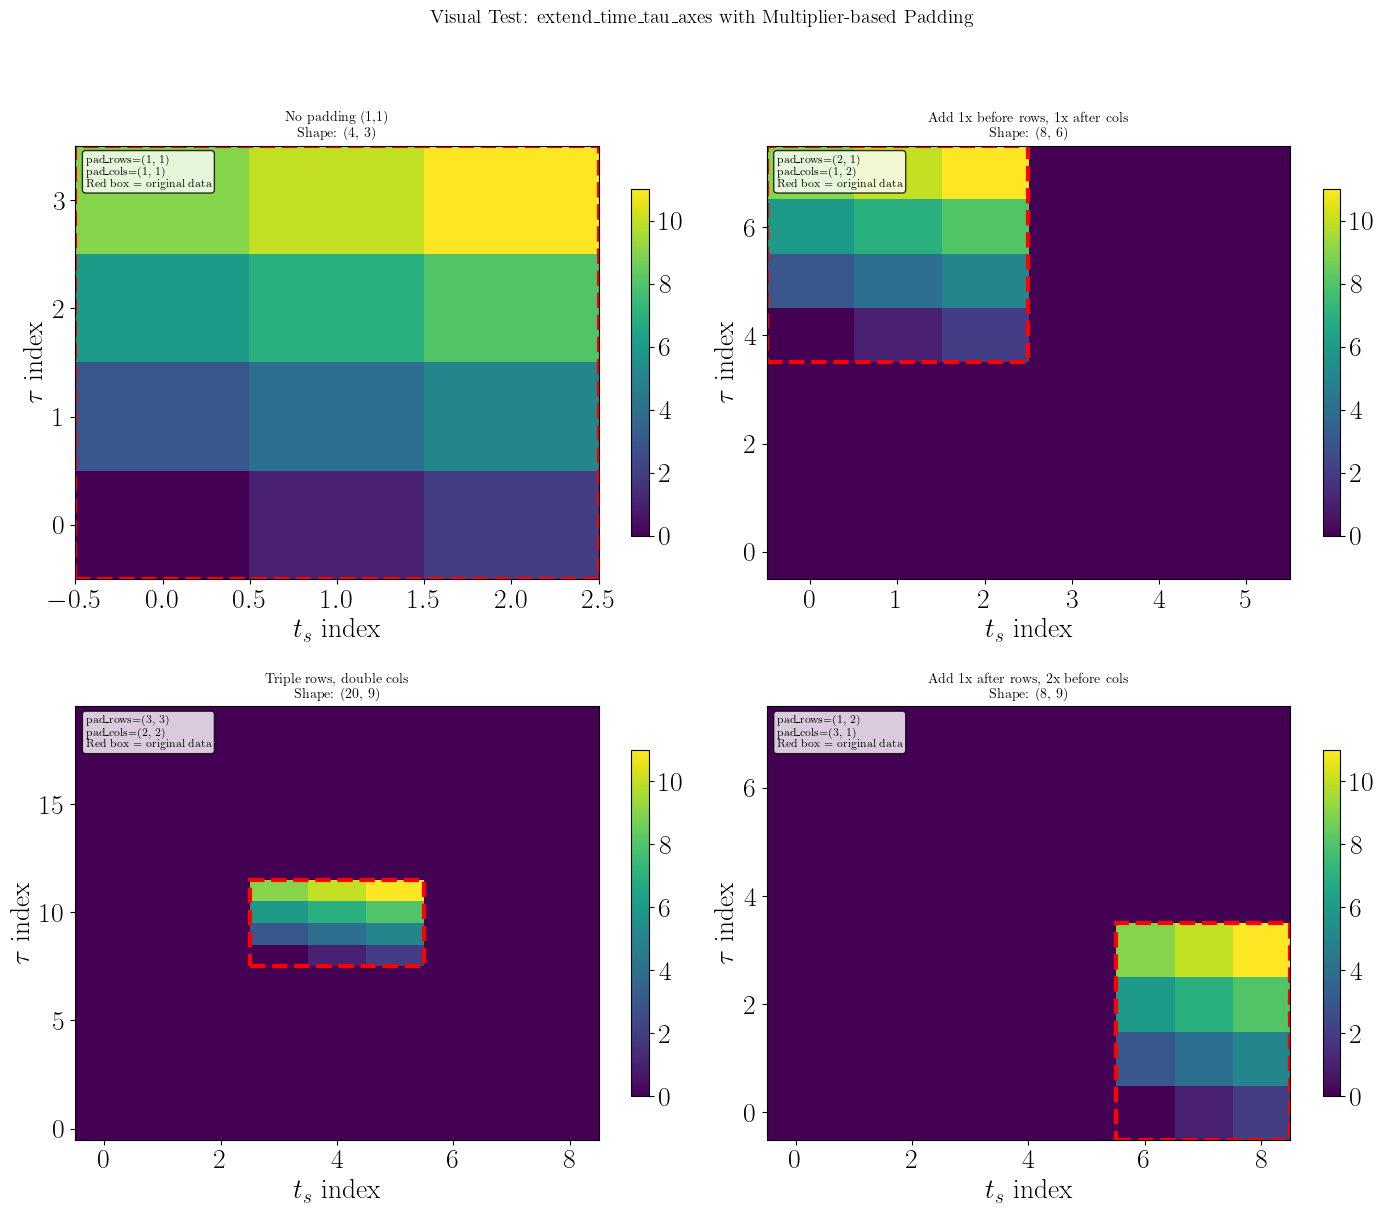

=== Error handling tests ===
✓ Correctly caught error: All padding multipliers must be >= 1
✓ Correctly caught error: All padding multipliers must be >= 1


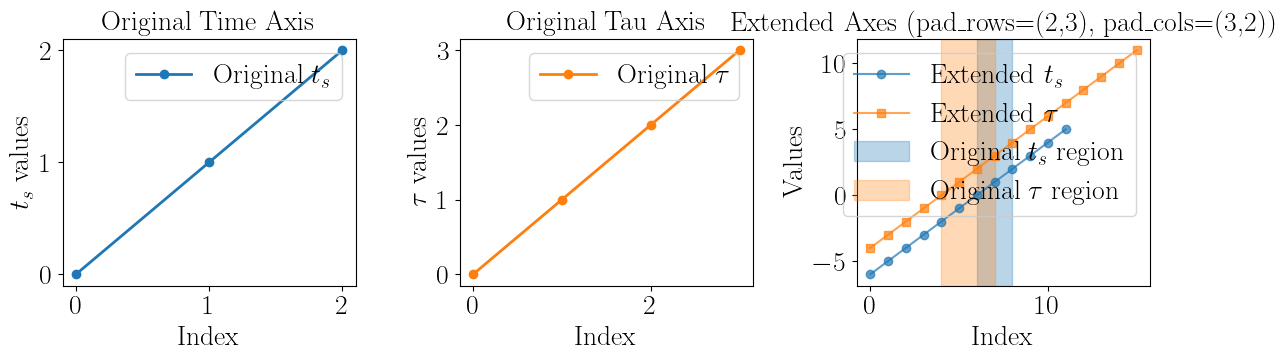


✓ All tests completed with visualizations!


In [1]:
# =============================
# TEST: extend_time_tau_axes with multiplier-based padding (VISUAL)
# =============================
import numpy as np
import matplotlib.pyplot as plt
from functions2DES import extend_time_tau_axes

### Create test data
ts_test   = np.array([0.0, 1.0, 2.0])          # 3 elements
taus_test = np.array([0.0, 1.0, 2.0, 3.0])     # 4 elements  
data_test = np.arange(12).reshape(4, 3)        # shape (4, 3) - rows=taus, cols=ts

print("Original data:")
print(f"  ts shape: {ts_test.shape}, values: {ts_test}")
print(f"  taus shape: {taus_test.shape}, values: {taus_test}")
print(f"  data shape: {data_test.shape}")
print(f"  data:\n{data_test}")
print()

### Test different padding scenarios with visualization
test_cases = [
    ((1, 1), (1, 1), "No padding (1,1)"),
    ((2, 1), (1, 2), "Add 1x before rows, 1x after cols"),
    ((3, 3), (2, 2), "Triple rows, double cols"),
    ((1, 2), (3, 1), "Add 1x after rows, 2x before cols"),
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (pad_rows, pad_cols, description) in enumerate(test_cases):
    print(f"=== {description} ===")
    print(f"pad_rows={pad_rows}, pad_cols={pad_cols}")
    
    try:
        extended_ts, extended_taus, padded_data = extend_time_tau_axes(
            ts_test, taus_test, data_test, 
            pad_rows=pad_rows, pad_cols=pad_cols
        )
        
        print(f"  Original shape: {data_test.shape}")
        print(f"  Padded shape: {padded_data.shape}")
        print(f"  Expected shape: {((pad_rows[0] + 1 + pad_rows[1]) * len(taus_test), (pad_cols[0] + 1 + pad_cols[1]) * len(ts_test))}")
        print(f"  Extended ts: {len(extended_ts)} points, range [{extended_ts[0]:.1f}, {extended_ts[-1]:.1f}]")
        print(f"  Extended taus: {len(extended_taus)} points, range [{extended_taus[0]:.1f}, {extended_taus[-1]:.1f}]")
        print(f"  Data range: [{padded_data.min():.1f}, {padded_data.max():.1f}]")
        
        ### Verify axis spacing is preserved
        if len(extended_ts) > 1:
            dt_original = ts_test[1] - ts_test[0]
            dt_extended = extended_ts[1] - extended_ts[0]
            print(f"  Time spacing preserved: {np.isclose(dt_original, dt_extended)}")
        
        if len(extended_taus) > 1:
            dtau_original = taus_test[1] - taus_test[0]  
            dtau_extended = extended_taus[1] - extended_taus[0]
            print(f"  Tau spacing preserved: {np.isclose(dtau_original, dtau_extended)}")
        
        ### Create visualization
        ax = axes[idx]
        im = ax.imshow(padded_data, cmap='viridis', aspect='auto', origin='lower')
        
        ### Mark original data region
        original_rows, original_cols = data_test.shape
        pad_rows_actual = ((pad_rows[0] - 1) * original_rows, (pad_rows[1] - 1) * original_rows)
        pad_cols_actual = ((pad_cols[0] - 1) * original_cols, (pad_cols[1] - 1) * original_cols)
        
        # Rectangle showing original data
        from matplotlib.patches import Rectangle
        rect = Rectangle(
            (pad_cols_actual[0] - 0.5, pad_rows_actual[0] - 0.5),
            original_cols, original_rows,
            linewidth=3, edgecolor='red', facecolor='none', linestyle='--'
        )
        ax.add_patch(rect)
        
        ax.set_title(f"{description}\nShape: {padded_data.shape}", fontsize=10)
        ax.set_xlabel(r"$t_s$ index")
        ax.set_ylabel(r"$\tau$ index") 
        
        ### Add colorbar
        plt.colorbar(im, ax=ax, shrink=0.8)
        
        ### Add text annotations for padding info
        ax.text(0.02, 0.98, 
                f"pad_rows={pad_rows}\npad_cols={pad_cols}\nRed box = original data", 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
    except Exception as e:
        print(f"  ERROR: {e}")
        axes[idx].text(0.5, 0.5, f"ERROR:\n{e}", transform=axes[idx].transAxes, 
                       ha='center', va='center', fontsize=10, color='red')
        axes[idx].set_title(f"{description} - FAILED")
    
    print()

plt.tight_layout()
plt.suptitle("Visual Test: extend_time_tau_axes with Multiplier-based Padding", 
             fontsize=14, y=1.02)
plt.show()

### Test error handling
print("=== Error handling tests ===")
try:
    extend_time_tau_axes(ts_test, taus_test, data_test, pad_rows=(0, 1), pad_cols=(1, 1))
    print("ERROR: Should have raised ValueError for multiplier < 1")
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

try:
    extend_time_tau_axes(ts_test, taus_test, data_test, pad_rows=(1, 1), pad_cols=(1, 0))
    print("ERROR: Should have raised ValueError for multiplier < 1")
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

### Visual comparison of axis extension
plt.figure(figsize=(12, 4))

### Test case with significant padding for clearer visualization
extended_ts, extended_taus, padded_data = extend_time_tau_axes(
    ts_test, taus_test, data_test, pad_rows=(2, 3), pad_cols=(3, 2)
)

plt.subplot(1, 3, 1)
plt.plot(ts_test, 'o-', label=r"Original $t_s$", color='C0', linewidth=2)
plt.xlabel("Index")
plt.ylabel(r"$t_s$ values")
plt.title("Original Time Axis")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(taus_test, 'o-', label=r"Original $\tau$", color='C1', linewidth=2)
plt.xlabel("Index") 
plt.ylabel(r"$\tau$ values")
plt.title("Original Tau Axis")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(extended_ts, 'o-', label=r"Extended $t_s$", color='C0', alpha=0.7)
plt.plot(extended_taus, 's-', label=r"Extended $\tau$", color='C1', alpha=0.7)
### Mark original regions
original_ts_start = len(ts_test) * 2  # 3 * (3-1) = 6 points before
original_ts_end = original_ts_start + len(ts_test)
original_tau_start = len(taus_test) * 1  # 4 * (2-1) = 4 points before  
original_tau_end = original_tau_start + len(taus_test)

plt.axvspan(original_ts_start, original_ts_end-1, alpha=0.3, color='C0', label="Original $t_s$ region")
plt.axvspan(original_tau_start, original_tau_end-1, alpha=0.3, color='C1', label="Original $\\tau$ region")
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Extended Axes (pad_rows=(2,3), pad_cols=(3,2))")
plt.legend()

plt.tight_layout()
plt.show()

print("\n✓ All tests completed with visualizations!")

In [1]:
import matplotlib.pyplot as plt
from qutip import *
import numpy as np
import pickle, os
import copy

# Import the outsourced settings / functions
from plot_settings import *
from functions2DES import *

# =============================
# Load 2D data from pickle file
# =============================
script_dir = os.getcwd()
filename = "data_tmax_500_dt_0.1.pkl"
save_path = os.path.join(script_dir, "papers_with_proteus_output", filename)

with open(save_path, "rb") as f:
    data = pickle.load(f)
    system_data = data["system"]
    times = data["times"]
    times_T = data["times_T"]
    two_d_datas = data["two_d_datas"]
#print("Loaded simulation with parameters", system_data.summary())

/home/leopold/PycharmProjects/Master_thesis/code/python/functions2DES.py:2490: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(


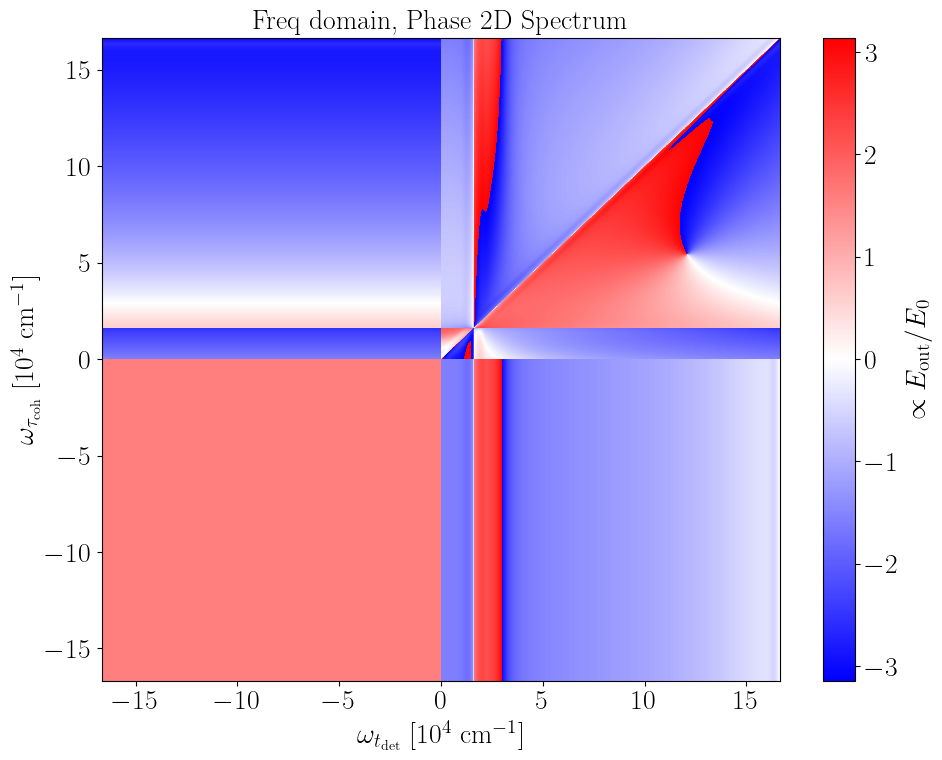

/home/leopold/PycharmProjects/Master_thesis/code/python/functions2DES.py:2490: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(


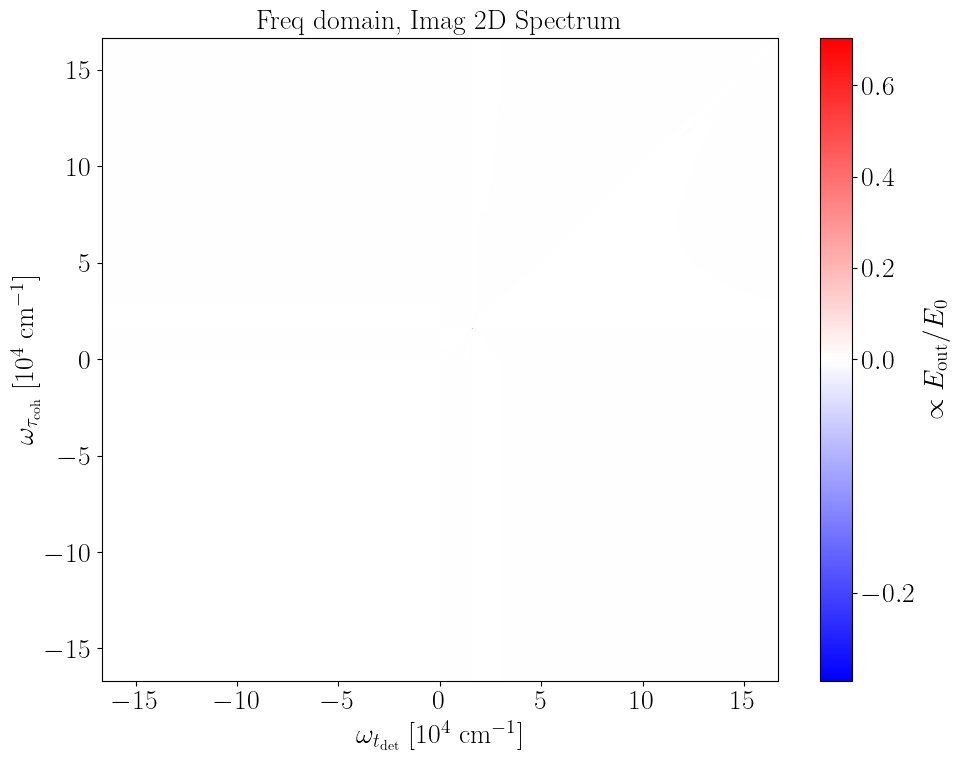

KeyboardInterrupt: 

In [2]:
# =============================
# plot for many T_waits
# =============================
types = ["phase", "imag", "real", "abs"]
for type_ in types:
    plot_args_freq = dict(
        domain="freq",
        type=type_,  # plot the real part (also "imag", "phase", "abs")
        save=True,  # (dont) save the spectrum
        output_dir=script_dir + "/figures",  # where to save the spectrum
        positive=False,  # only plot the positive spectrum
        use_custom_colormap=True,  # all zeros are white
        # section=(1.53, 1.65, 1.53, 1.65),  # focus on the non zero feature
        # section=(1., 2., 1., 2.),  # focus on the non zero feature
        system=system_data,
    )


    extend_for = (1, 1)  # make the plot smooth
    # Your existing plotting code
    extend_and_plot_results(
        two_d_datas,
        times_T=times_T,
        times=times,
        extend_for=extend_for,
        **plot_args_freq,
    )

In [3]:
# Import the outsourced settings / functions
from functions2DES import *

import numpy as np
import psutil
import copy
import time
import pickle
import sys
import os


def main():
    """
    Main function to run the 2D spectroscopy simulation.
    """
    start_time = time.time()

    # =============================
    # SIMULATION PARAMETERS
    # =============================
    n_times_T = 1  # Number of T_wait values (pump-probe separation)
    n_phases = 2  # Number of phases for phase cycling
    n_freqs = 1  # Number of frequencies for inhomogeneous broadening

    phases = [k * np.pi / 2 for k in range(n_phases)]
    max_workers = psutil.cpu_count(logical=True)

    print("=" * 60)
    print("2D ELECTRONIC SPECTROSCOPY SIMULATION")
    print("=" * 60)
    print(f"Configuration:")
    print(
        f"  Parameters: #T_wait={n_times_T}, #phases={n_phases}, #frequencies={n_freqs}"
    )
    print(
        f"  Total combinations processed: {n_times_T * n_phases * n_phases * n_freqs}"
    )
    print(f"  Parallel workers used: {max_workers}")

    print()

    # =============================
    # SYSTEM PARAMETERS
    # =============================
    system = SystemParameters(
        N_atoms=1,
        ODE_Solver="Paper_eqs",
        RWA_laser=True,
        t_max=20.0,  # determines Δω
        dt=0.05,  # determines ωₘₐₓ
        Delta_cm=200 if n_freqs > 1 else 0,
    )

    # Create time arrays
    Delta_ts = system.Delta_ts
    times = np.arange(-Delta_ts[0], system.t_max, system.dt)
    T_wait_max = times[-1] / 10
    times_T = np.linspace(0, T_wait_max, n_times_T)

    print(f"System configuration:")
    system.summary()

    # =============================
    # SOLVER VALIDATION
    # =============================
    print("\nValidating solver stability...")
    test_system = copy.deepcopy(system)
    test_system.t_max = 10 * system.t_max
    test_system.dt = 10 * system.dt
    times_test = np.arange(-Delta_ts[0], test_system.t_max, test_system.dt)

    global time_cut  # SOMEHOW THIS Variable MAKES A PROBLEM NOW!!!!! TODO
    _, time_cut = check_the_solver(times_test, test_system)
    print(f"Evolution remains physical until: {time_cut:.1f} fs")

    # =============================
    # FREQUENCY SAMPLING
    # =============================
    omega_ats = sample_from_sigma(
        n_freqs, system.Delta_cm, system.omega_A_cm, E_range=3
    )

    # =============================
    # RUN SIMULATION
    # =============================
    print(f"\nStarting 2D spectroscopy calculation...")

    kwargs = {"plot_example": True}

    two_d_datas = batch_process_all_combinations_with_inhomogeneity(
        omega_ats=omega_ats,
        phases=phases,
        times_T=times_T,
        times=times,
        system=system,
        max_workers=max_workers,
        **kwargs,
    )

    # =============================
    # SAVE RESULTS
    # =============================
    """
    output_dir = (
        sys.argv[1]
        if len(sys.argv) > 1
        else os.path.join(
            os.path.dirname(os.path.abspath(__file__)), "papers_with_proteus_output"
        )
    )
    os.makedirs(output_dir, exist_ok=True)

    # Generate unique filename
    base_filename = f"data_tmax_{system.t_max:.0f}_dt_{system.dt}.pkl"
    save_path = os.path.join(output_dir, base_filename)

    counter = 1
    while os.path.exists(save_path):
        save_path = os.path.join(
            output_dir, f"data_tmax_{system.t_max:.0f}_dt_{system.dt}_{counter}.pkl"
        )
        counter += 1

    with open(save_path, "wb") as f:
        pickle.dump(
            {
                "system": system,
                "times": times,
                "times_T": times_T,
                "two_d_datas": two_d_datas,
            },
            f,
        )
    """

    # =============================
    # SIMULATION SUMMARY
    # =============================
    elapsed_time = time.time() - start_time
    hours = int(elapsed_time // 3600)
    minutes = int((elapsed_time % 3600) // 60)
    seconds = elapsed_time % 60

    # Calculate largest 2D data size
    max_data_size = 0
    for data in two_d_datas:
        if data is not None:
            max_data_size = max(max_data_size, data.size)

    # Estimate memory usage in MB
    estimated_memory_usage = 2 * max_data_size * n_times_T * 8 / (1024**2)

    print("\n" + "=" * 60)
    print("SIMULATION COMPLETED SUCCESSFULLY")
    print("=" * 60)
    print()
    print(f"Data characteristics:")
    print(f"  Time parameters: t_max={system.t_max:.1f} fs, dt={system.dt:.1f} fs")
    print(f"  Largest 2D array size: {max_data_size:,} elements")
    print(f"  Time grid points: {len(times):,}")
    print()
    print(f"Performance:")
    print(f"  Execution time: {hours}h {minutes}m {seconds:.1f}s")
    print(f"  Estimated memory usage: {estimated_memory_usage:.2f} MB")
    print()
#    print(f"  Data saved to: {save_path}")
    print("=" * 60)


if __name__ == "__main__":
    main()

2D ELECTRONIC SPECTROSCOPY SIMULATION
Configuration:
  Parameters: #T_wait=1, #phases=2, #frequencies=1
  Total combinations processed: 4
  Parallel workers used: 8

System configuration:
=== SystemParameters Summary ===

# The system with:
    N_atoms             : 1
    ODE_Solver          : Paper_eqs
    RWA_laser           : True
was analyzed.

# With parameters for the SIMULATION:
    t_max               : 20.0 fs
    dt                  : 0.05 fs
    pulse_duration      : 15.0 fs
    omega_laser         : 16000.0 cm^-1
    E0                  : 0.05 (mu*E0, such that excitation is < 1%!)

# With parameters for the ATOMS:
    omega_A             : 16000.0 cm^-1
    mu_A                : 1.0
    Delta               : 0 cm^-1

# With parameters for the BATH:
    gamma_0             : 0.0033 fs-1?
    gamma_phi           : 0.0100 fs-1?
    Temp                : 1.0
    cutoff              : 1.0 omega_A

# Additional generated parameters are:

    psi_ini             :
Quantum object:

In [3]:
system = SystemParameters(
    N_atoms=1,
    ODE_Solver="Paper_eqs",
    RWA_laser=True,
    t_max=100.0,  # determines Δω
    dt=0.2,  # determines ωₘₐₓ
    Delta_cm=200,  # inhomogeneous broadening
)
times_test = np.arange(-system.Delta_ts[0], system.t_max, system.dt)
test_params_copy         = copy.deepcopy(system)
if 'time_cut' not in globals() or test_params_copy.t_max != system.t_max:
    # =============================
    # ALWAYS CHECK Before running a serious simulation
    # =============================
    test_params_copy.t_max   = 10 * system.t_max
    test_params_copy.dt = 10 * system.dt
    test_Delta_ts            = test_params_copy.Delta_ts
    times_test_              = np.arange(-test_Delta_ts[0], test_params_copy.t_max, test_params_copy.dt)
    result, time_cut         = check_the_solver(times_test_, test_params_copy)
    print("the evolution is actually unphisical after:", time_cut, "fs")

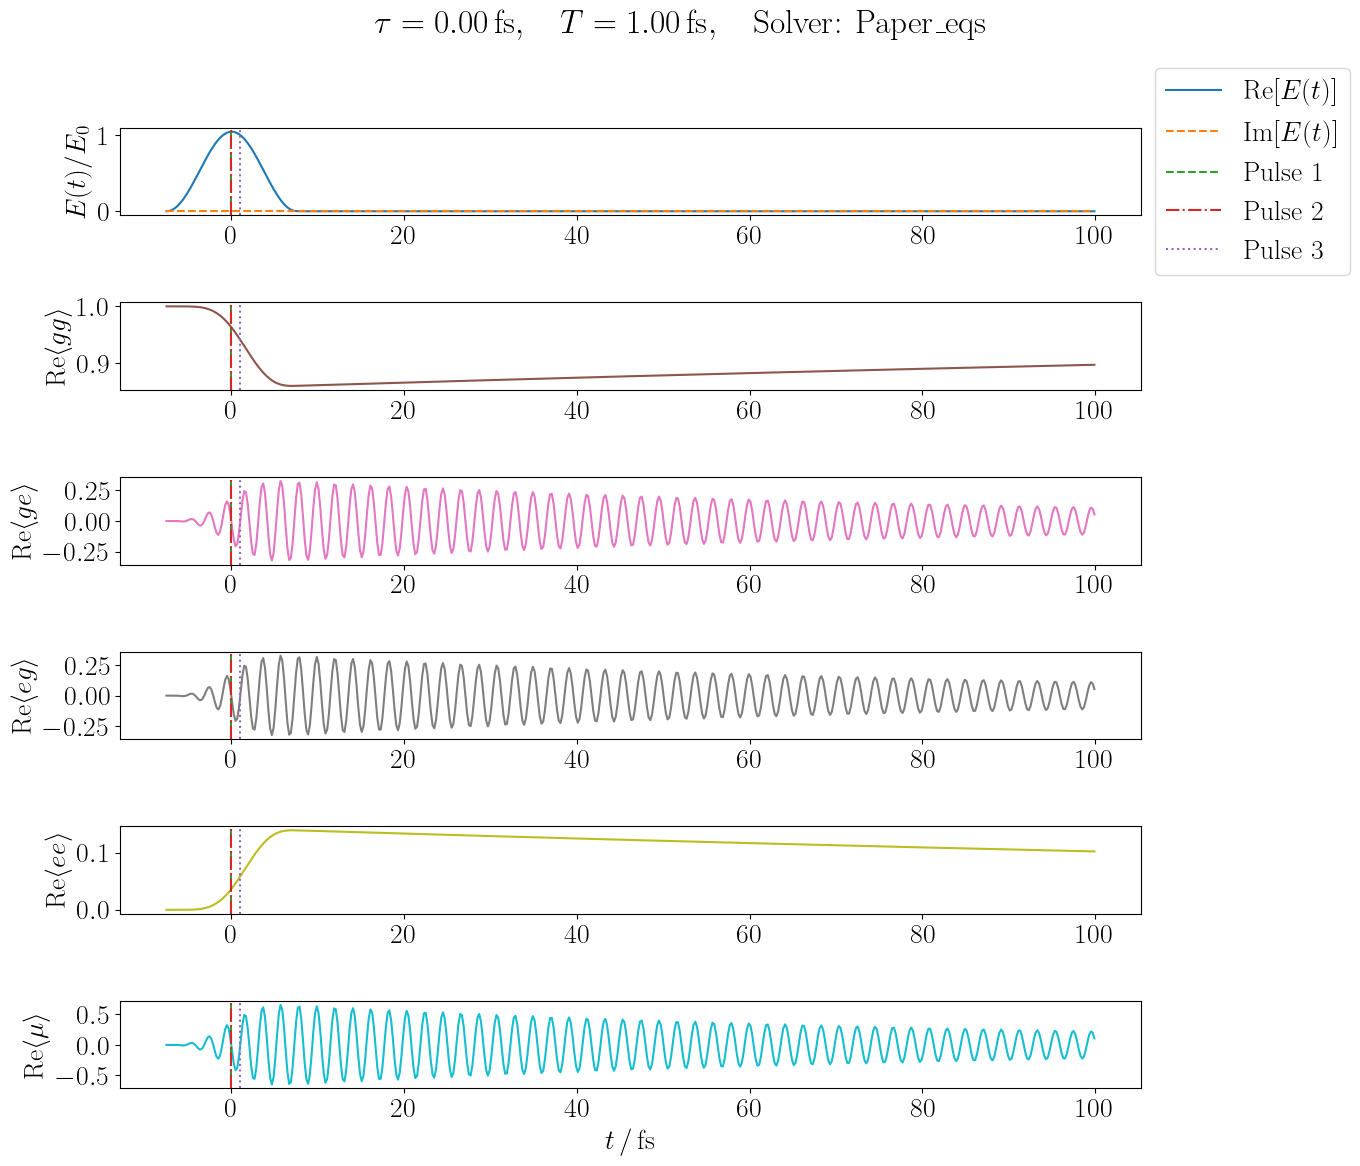

KeyboardInterrupt: 

In [4]:
T_wait_test = 1* (times_test_[1]- times_test_[0])
data_test_0 = compute_two_dimensional_polarization(T_wait_test, phases[0], phases[0], times=times_test, system=system,   plot_example=True)
#data_test_1 = compute_many_polarizations(T_wait_test, phases[0], phases[0], times=times_test_, N=10, E0=omega_A, Delta=Delta)

In [ ]:
plot_args_freq = dict(                   # (**changeable**) 
    domain="freq",                   
    type="real",                    # plot the real part (also "imag", "phase", "abs")
    save=False,                     # (dont) save the spectrum
    positive=True,                  # only plot the positive spectrum
    use_custom_colormap=True,# all zeros are white
    section=(1.525, 1.675, 1.525, 1.675),  # focus on the non zero feature
)

ts, taus, data = data_test_0[0], data_test_0[1], data_test_0[2]
#ts, taus, data, omega_samples = data_test_1[0], data_test_1[1], data_test_1[2], data_test_1[3]

extend_for = (1, 1)
data = data.astype(np.complex64)
data = 1j * data  # because E ~ i*P
ts, taus, data = extend_time_tau_axes(ts, taus, data, pad_rows=extend_for, pad_cols=extend_for)
plot_positive_color_map(
    (ts, taus, data),
    type="imag", # because E ~ i*P
    T_wait=T_wait_test, 
    save=False,
    use_custom_colormap=True,
)

nu_ts, nu_taus, s2d = compute_2d_fft_wavenumber(ts, taus, data)
plot_positive_color_map(
    (nu_ts, nu_taus, s2d),
    T_wait=T_wait_test, 
    **plot_args_freq
)

NameError: name 'data_test_0' is not defined

In [ ]:
# =============================
# THIS CELL IS MAINLY FOR TESTING
# =============================
# Example input data
"""
ts    = np.array([0.0, 1.0, 2.0])
taus  = np.array([0.0, 1.0, 2.0, 3.0])
data  = np.arange(12).reshape(4, 3)  # shape (4, 3)

# Pad 1 row before, 2 rows after; 1 col before, 1 col after
pad_rows = (0, 0)
pad_cols = (1, 1)

extended_ts, extended_taus, padded_data = extend_time_tau_axes(
    ts, taus, data, pad_rows=pad_rows, pad_cols=pad_cols
)

print("Original data shape:", data.shape)
print("Padded data shape:", padded_data.shape)
print("Extended ts:", extended_ts)
print("Extended taus:", extended_taus)
print("Padded data:\n", padded_data)
"""


# =============================
# Example: How to use PulseSequence with SystemParameters
# =============================

# Assume test_params is an instance of SystemParameters
test_params = SystemParameters(
    N_atoms=1,
    ODE_Solver="Paper_eqs",
    RWA_laser=True,
    Delta_cm=200.0,
    omega_A_cm=16000.0,
    mu_A=1.0,
    omega_laser_cm=16000.0,
    E0=0.1,
    pulse_duration=15.0,
    t_max=100.0,
    dt=0.5,
    gamma_0=1/200,
    gamma_phi=1/100
)
test_params.summary()

test_times = np.arange(-10, test_params.t_max, test_params.dt)
test_pulse_phases = [np.pi / 2, 0, np.pi / 4]
test_pulse_amps   = [2.0, 1.0, 0.1]

# Use SystemParameters to generate pulses
pulses = [
    Pulse(
        pulse_start_time = t,
        pulse_half_width = test_params.pulse_duration / 2,
        pulse_phase      = phi,
        pulse_amplitude  = amp,
        pulse_freq       = 2 * np.pi * test_params.omega_laser
    )
    for t, phi, amp in zip(
        [test_times[0], test_times[-1]/5, test_times[-1]/2],
        test_pulse_phases,
        test_pulse_amps
    )
]

pulse_seq = PulseSequence(pulses=pulses)

# Example usage:
y0 = El_field_3_pulses(test_times, pulse_seq, f=pulse_envelope)
y1 = El_field_3_pulses(test_times, pulse_seq, f=Epsilon_pulse)

plt.plot(test_times, y0, label="Envelope")
plt.plot(test_times, y1, label="E_pulse")
plt.legend()
plt.show()

# =============================
# TEST: plot_positive_color_map with cos(x)*sin(y)
# =============================
x      = test_times
y      = test_times
X, Y   = np.meshgrid(x, y)
data   = np.cos(X) * np.sin(Y)

plot_positive_color_map(
    datas=(x, y, data),
    domain="real",
    type="real",
    positive=True,
    use_custom_colormap=True,
)
xfreq, yfreq, datafreq = compute_2d_fft_wavenumber(x, y, data)

plot_positive_color_map(
    datas=(xfreq, yfreq, datafreq),
    domain="freq",
    type="real",
    positive=True,
    use_custom_colormap=True,
    section=(1.525, 1.675, 1.525, 1.675),  # focus on the non zero feature

)

In [ ]:
# TODO EXPORT this into the functions2DES.py file

def compute_fixed_tau_T(
    tau_coh: float,
    T_wait: float,
    phi_0: float,
    phi_1: float,
    times: np.ndarray,
    system: SystemParameters,
    **kwargs,
):
    """
    Compute the data for a fixed tau_coh and T_wait.

    Parameters
    ----------
    tau_coh : float
        Coherence time.
    T_wait : float
        Waiting time.
    phi_0 : float
        Phase of the first pulse.
    phi_1 : float
        Phase of the second pulse.
    times : np.ndarray
        Time array for the simulation.
    system : SystemParameters
        System parameters object.

    Returns
    -------
    tuple
        (t_det_vals, data) where t_det_vals are the detection times (shifted to start at zero)
        and data is the corresponding computed observable.
    """

    idx_start_0 = 0
    t_start_0 = times[idx_start_0]  # ALWAYS the starting point of the first pulse
    idx_end_0 = np.abs(times - (system.Delta_ts[0])).argmin()
    idx_start_1 = np.abs(times - (tau_coh - system.Delta_ts[1])).argmin()

    t_start_1 = times[idx_start_1]  # Start time of the second pulse

    times_0 = times[
        : idx_start_1 + 1
    ]  # definetly not empty except for when T_wait >= t_max
    if times_0.size == 0:
        times_0 = times[: idx_end_0 + 1]

    # calculate the evolution of the first pulse in the desired range for tau_coh

    # First pulse
    pulse_0 = (t_start_0, phi_0)
    # Instead of directly constructing PulseSequence, use from_args:
    pulse_seq_0 = PulseSequence.from_args(
        system=system,
        curr=pulse_0,
    )
    data_0 = compute_pulse_evolution(
        system.psi_ini, times_0, pulse_seq_0, system=system
    )

    rho_1 = data_0.states[idx_start_1]

    idx_end_1 = np.abs(
        times - (tau_coh + system.Delta_ts[1])
    ).argmin()  # index at which the second pulse ends
    # Take the state (after / also during) the first pulse and evolve it with the second (and potentially overlaped first) pulse

    # select range  ->  to reduce computation time
    idx_start_2 = np.abs(times - (tau_coh + T_wait - system.Delta_ts[2])).argmin()
    t_start_2 = times[idx_start_2]  # the time at which the third pulse starts
    idx_end_2 = np.abs(
        times - (tau_coh + T_wait + system.Delta_ts[2])
    ).argmin()  # end of the third pulse
    # idx_start_2_0 = np.abs(times - (T_wait - Delta_ts[2])).argmin() # the first time at which the third pulse starts

    times_1 = times[
        idx_start_1 : idx_start_2 + 1
    ]  # like this: also take the overlap into account;

    if times_1.size == 0:
        times_1 = times[idx_start_1 : idx_end_1 + 1]

    # Handle overlapping pulses: If the second pulse starts before the first pulse ends, combine their contributions
    pulse_1 = (t_start_1, phi_1)
    pulse_seq_1 = PulseSequence.from_args(
        system=system,
        curr=pulse_1,
        prev=pulse_0,
    )
    data_1 = compute_pulse_evolution(rho_1, times_1, pulse_seq_1, system=system)

    idx_start_2_in_times_1 = np.abs(times_1 - (t_start_2)).argmin()

    rho_2 = data_1.states[
        idx_start_2_in_times_1
    ]  # == state where the third pulse starts

    times_2 = times[
        idx_start_2:
    ]  # the rest of the evolution (third pulse, potentially overlaped with previouses) # can be empty, if tau_coh + T_wait >= t_max
    # print(len(times), len(times_0), len(times_1), len(times_2))
    if times_2.size == 0:
        times_2 = [times[idx_start_2]]
    # If the second pulse starts before the first pulse ends, combine their contributions
    phi_2 = 0  # FIXED PHASE!
    pulse_f = (t_start_2, phi_2)
    pulse_seq_f = PulseSequence.from_args(
        system=system,
        curr=pulse_f,
        prev=pulse_1,
        preprev=pulse_0,
    )
    data_f = compute_pulse_evolution(rho_2, times_2, pulse_seq_f, system=system)

    t_det_start_idx_in_times_2 = np.abs(
        times_2 - (times_2[0] + system.Delta_ts[2])
    ).argmin()  # detection time index in times_2
    t_last_pulse_peak = times_2[t_det_start_idx_in_times_2]
    # only if we are still in the physical regime
    states = data_f.states[t_det_start_idx_in_times_2:]
    t_det_vals = data_f.times[t_det_start_idx_in_times_2:]
    data = np.zeros(
        (len(t_det_vals)), dtype=np.complex64
    )  # might get uncontrollable big!TODO

    # print(t_det_vals[0], t_det_vals[1], t_det_vals[-1], len(t_det_vals))

    if system.RWA_laser:
        states = [
            apply_RWA_phase_factors(state, time, omega=system.omega_laser)
            for state, time in zip(states, t_det_vals)
        ]

    for t_idx, t_det in enumerate(t_det_vals):
        if t_det < time_cut:
            data[:] = np.real(expect(system.Dip_op, states[:]))
    return np.array(t_det_vals) - t_det_vals[0], data


# Plot the data for a fixed tau_coh and T_wait
def plot_fixed_tau_T(
    tau_coh: float,
    T_wait: float,
    phi_0: float,
    phi_1: float,
    times: np.ndarray,
    system: SystemParameters,
):
    """
    Plot the data for a fixed tau_coh and T.

    Parameters
    ----------
    tau_coh : float
        Coherence time.
    T_wait : float
        Waiting time.
    phi_0 : float
        Phase of the first pulse.
    phi_1 : float
        Phase of the second pulse.
    times : np.ndarray
        Time array for the simulation.
    system : SystemParameters
        System parameters object.

    Returns
    -------
    None
    """
    t_det_vals, data = compute_fixed_tau_T(
        tau_coh, T_wait, phi_0, phi_1, times, system=system
    )

    plt.figure(figsize=(10, 6))
    plt.plot(
        t_det_vals,
        np.real(data),
        label=r"$|\langle \mu \rangle|$",
        color="C0",
        linestyle="solid",
    )
    plt.xlabel(r"$t \, [\text{fs}]$")
    plt.ylabel(r"$|\langle \mu \rangle|$")
    plt.title(
        rf"Expectation Value of $|\langle \mu \rangle|$ for fixed $\tau={tau_coh}$ and $T={T_wait}$"
    )
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()


def compute_average_fixed_tau_T(
    tau_coh: float,
    T_wait: float,
    times: np.ndarray,
    phases: list,
    system: SystemParameters,
):
    """
    Compute the average data for a fixed tau_coh and T_wait over all phase combinations.

    Parameters
    ----------
    tau_coh : float
        Coherence time.
    T_wait : float
        Waiting time.
    times : np.ndarray
        Time array for the simulation.
    phases : list
        List of phase values.
    system : SystemParameters
        System parameters object.

    Returns
    -------
    tuple
        (t_det_vals, data_avg)
    """
    results = []
    for phi_0 in phases:
        for phi_1 in phases:
            try:
                result = compute_fixed_tau_T(
                    tau_coh, T_wait, phi_0, phi_1, times=times, system=system
                )
                results.append(result)
            except Exception as e:
                print(f"Error in computation for phi_0={phi_0}, phi_1={phi_1}: {e}")
                raise

    t_det_vals = results[0][0]  # Time values are the same for all computations
    data_sum = np.zeros_like(results[0][1], dtype=complex)
    for _, data in results:
        data_sum += data
    data_avg = data_sum / len(results)

    return t_det_vals, data_avg

def plot_average_fixed_tau_T(
    tau_coh: float,
    T_wait: float,
    times: np.ndarray,
    phases: list,
    system: SystemParameters,
):
    """
    Plot the averaged data for a fixed tau_coh and T_wait over all phase combinations.

    Parameters
    ----------
    tau_coh : float
        Coherence time.
    T_wait : float
        Waiting time.
    times : np.ndarray
        Time array for the simulation.
    phases : list
        List of phase values.
    system : SystemParameters
        System parameters object.

    Returns
    -------
    None
    """
    t_det_vals, data_avg = compute_average_fixed_tau_T(
        tau_coh, T_wait, times, phases, system=system
    )

    plt.figure(figsize=(10, 6))
    plt.plot(
        t_det_vals,
        np.abs(data_avg),
        label=r"$|\langle \mu \rangle|$",
        color="C0",
        linestyle="solid",
    )
    plt.xlabel(r"$t \, [\text{fs}]$")
    plt.ylabel(r"$|\langle \mu \rangle|$")
    plt.title(
        rf"Expectation Value of $|\langle \mu \rangle|$ for fixed $\tau={tau_coh}$ and $T={T_wait}$ (averaged over phases)"
    )
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

def compute_average_fixed_tau_T_over_omega_ats(
    tau_coh: float,
    T_wait: float,
    times: np.ndarray,
    phases: list,
    omega_ats: list,
    system: SystemParameters,
) -> tuple[np.ndarray, np.ndarray]:
    """
    Compute the average data for a fixed tau_coh and T_wait over all phase combinations
    and a list of omega_ats (inhomogeneous broadening).

    Parameters
    ----------
    tau_coh : float
        Coherence time.
    T_wait : float
        Waiting time.
    times : np.ndarray
        Time array for the simulation.
    phases : list
        List of phase values.
    omega_ats : list
        List of omega_A_cm values to average over.
    system : SystemParameters
        System parameters object.

    Returns
    -------
    tuple
        (t_det_vals, data_avg) where data_avg is averaged over all omega_ats and phase combinations.
    """
    all_results = []

    # =============================
    # Loop over all omega_ats
    # =============================
    for omega_at in omega_ats:
        system_new = copy.deepcopy(system)
        system_new.omega_A_cm = omega_at
        t_det_vals, data_avg = compute_average_fixed_tau_T(
            tau_coh, T_wait, times, phases, system=system_new
        )
        all_results.append(data_avg)

    # =============================
    # Average over all omega_ats
    # =============================
    data_avg_over_omega = np.mean(np.stack(all_results), axis=0)

    return t_det_vals, data_avg_over_omega

# Test the function and plot the data
t_max_test = 1900
dt_test = 20
times_test = np.arange(
    -test_params.Delta_ts[0], t_max_test, dt_test
)  # High-resolution times array to do the evolutions
tau_coh_test = 300
T_wait_test = 1000

# plot_fixed_tau_T(tau_coh_test, T_wait_test, phases[0], phases[1], times=times_test)
# plot_average_fixed_tau_T(
#    tau_coh_test, T_wait_test, times_test, phases, system=test_params
#)

omega_ats = sample_from_sigma(N=10, Delta=test_params.Delta, E0=test_params.omega_A)
t_det_vals, data_avg = compute_average_fixed_tau_T_over_omega_ats(
    tau_coh_test, T_wait_test, times_test, phases, omega_ats, system=test_params
)

plt.figure(figsize=(10, 6))
plt.plot(t_det_vals, np.abs(data_avg), label=r"$|\langle \mu \rangle|$ (avg over $\omega_A$)", color="C1", linestyle="dashed")
plt.xlabel(r"$t \, [\text{fs}]$")
plt.ylabel(r"$|\langle \mu \rangle|$")
plt.title(rf"Expectation Value of $|\langle \mu \rangle|$ for fixed $\tau={tau_coh_test}$ and $T={T_wait_test}$ (avg over $\omega_A$ and phases)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:


"""
# =============================
# PLOT THE FUNCTION
# =============================

### Generate values for plotting
E_values = np.linspace(-10, 10, 500) # energy range
E0       = omega_A                       # center energy

### Calculate sigma values
sigma_values = sigma(E_values, Delta, E0)

### Plot the function
plt.figure(figsize=(10, 6))
plt.plot(E_values, sigma_values, label=rf"$\Delta = {Delta}, E_0 = {E0}$", color='C0', linestyle='solid')
plt.title(rf"$\sigma(E - E_0)$ Function")
plt.xlabel(rf"$E$")
plt.ylabel(rf"$\sigma(E - E_0)$")
plt.legend()
plt.tight_layout()
plt.show()
"""



"""
# Test the sampling function
Delta_test = Delta
E0_test = omega_A
samples = sample_from_sigma(100, Delta=Delta_test, E0=E0_test)

# Plot the results
E_vals = np.linspace(E0_test - 5 * Delta_test, E0_test + 5 * Delta_test, 1000)
sigma_vals = sigma(E_vals, Delta_test, E0_test)

plt.figure(figsize=(8, 4))
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Sampled histogram')
plt.plot(E_vals, sigma_vals / np.trapz(sigma_vals, E_vals), 'r-', label=rf'Normalized $\sigma$(E)')
plt.xlabel('E')
plt.ylabel('Probability Density')
plt.title(r'Rejection Sampling from rf$\sigma$(E)')
plt.legend()
plt.show()
"""
